#Problem Statement:
###Acme Corporation, a leading tech company, is facing a significant challenge with employee turnover. The HR department is concerned about the increasing rate of attrition, as it negatively impacts team dynamics, project continuity, and overall company morale. To address this issue, Acme Corporation wants to leverage data analytics and machine learning to understand the factors influencing employee turnover and predict which employees are likely to leave in the near future

###Import the  libraries for data analysis

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###Read the HR employee attrition CSV dataset

In [55]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(15)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [29]:
#Check the number of rows and columns in the dataset
df.shape

(1470, 35)

In [60]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Attrition' column
df.loc[df['Attrition'] == 'No', 'Attrition'] = 0
df.loc[df['Attrition'] == 'Yes', 'Attrition'] = 1


In [61]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Check the numbers of columns and rows

In [62]:
df.shape

(1470, 35)

###Check the descriptive statistics of the dataset

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


###Group by Job Role and calculate turnover rate

In [65]:
role_turnover = df.groupby('JobRole')['Attrition'].mean() * 100
role_turnover = role_turnover.sort_values(ascending=False)
print("\nJob Role turnover rates:")
print(role_turnover)



Job Role turnover rates:
JobRole
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist            16.09589
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director                  2.5
Name: Attrition, dtype: object


### Group by department and calculate turnover rate

In [66]:
department_turnover = df.groupby('Department')['Attrition'].mean() * 100
department_turnover = department_turnover.sort_values(ascending=False)
print("Department turnover rates:")
print(department_turnover)


Department turnover rates:
Department
Sales                     20.627803
Human Resources           19.047619
Research & Development     13.83975
Name: Attrition, dtype: object


###Check the uniquen value count of each column

In [67]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

###Make bar graph to show the attrition rates according to the departments

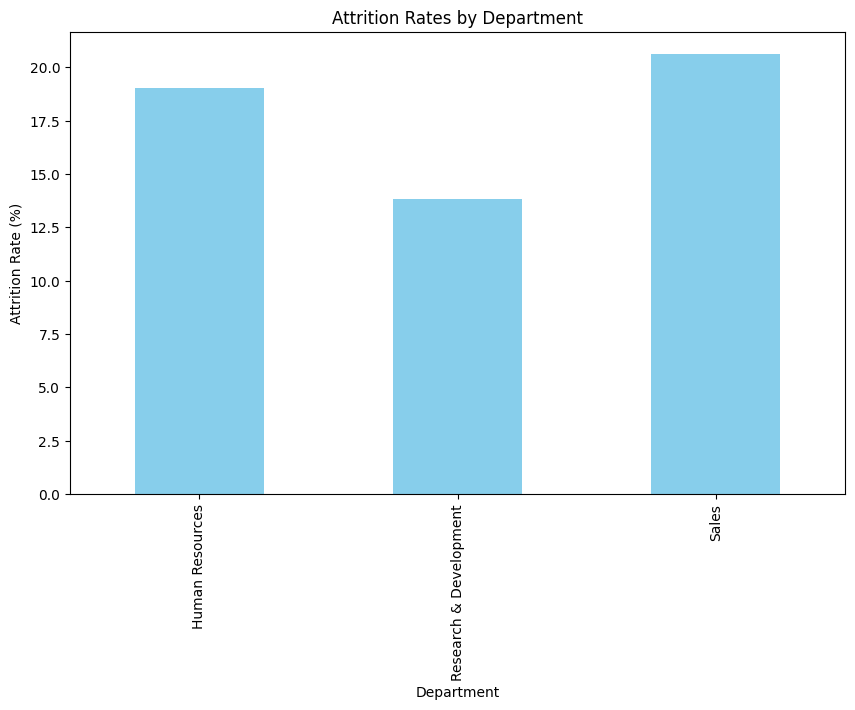

In [69]:
# Group by department and calculate attrition rates
attrition_by_department = df.groupby('Department')['Attrition'].mean() * 100

# Plot the bar chart
attrition_by_department.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set the title and labels
plt.title('Attrition Rates by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')

# Show the plot
plt.show()

###Make bar graph to show the attrition rates according to the Job Role

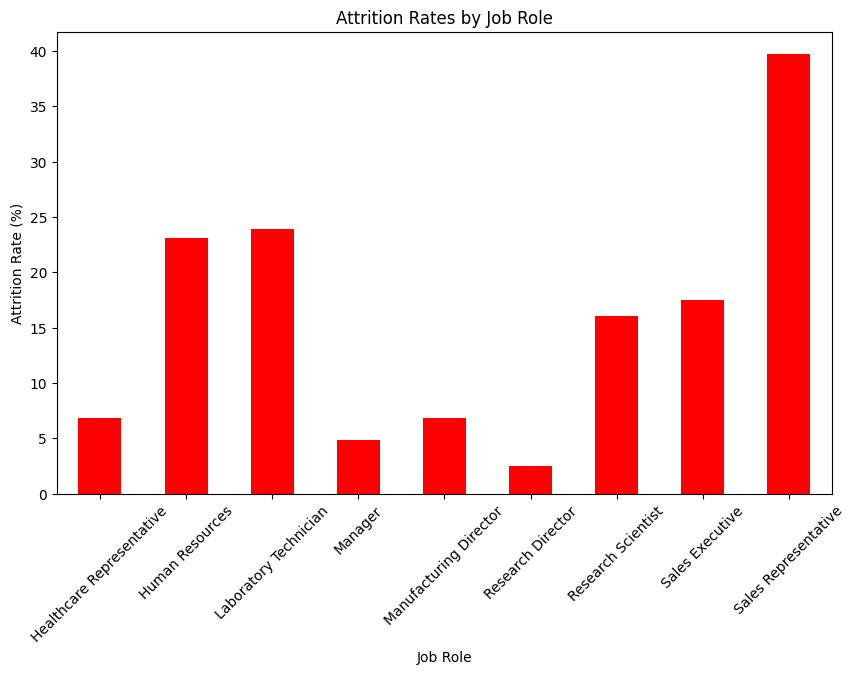

In [72]:
attrition_by_jobrole = df.groupby('JobRole')['Attrition'].mean() * 100

# Plot the bar chart
attrition_by_jobrole.plot(kind='bar', figsize=(10, 6), color='Red')

# Set the title and labels
plt.title('Attrition Rates by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

###Make bar graph to show the attrition rates according to the Job Satisfaction

<ipython-input-74-908c5f1e6f4d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobSatisfaction', y='Attrition', data=df, ci=None)


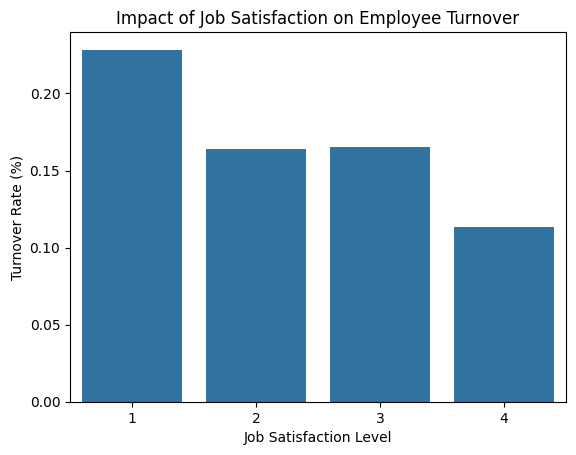

In [74]:
sns.barplot(x='JobSatisfaction', y='Attrition', data=df, ci=None)
plt.title('Impact of Job Satisfaction on Employee Turnover')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Turnover Rate (%)')
plt.show()

###Make bar graph to show the attrition rates for Workload factors

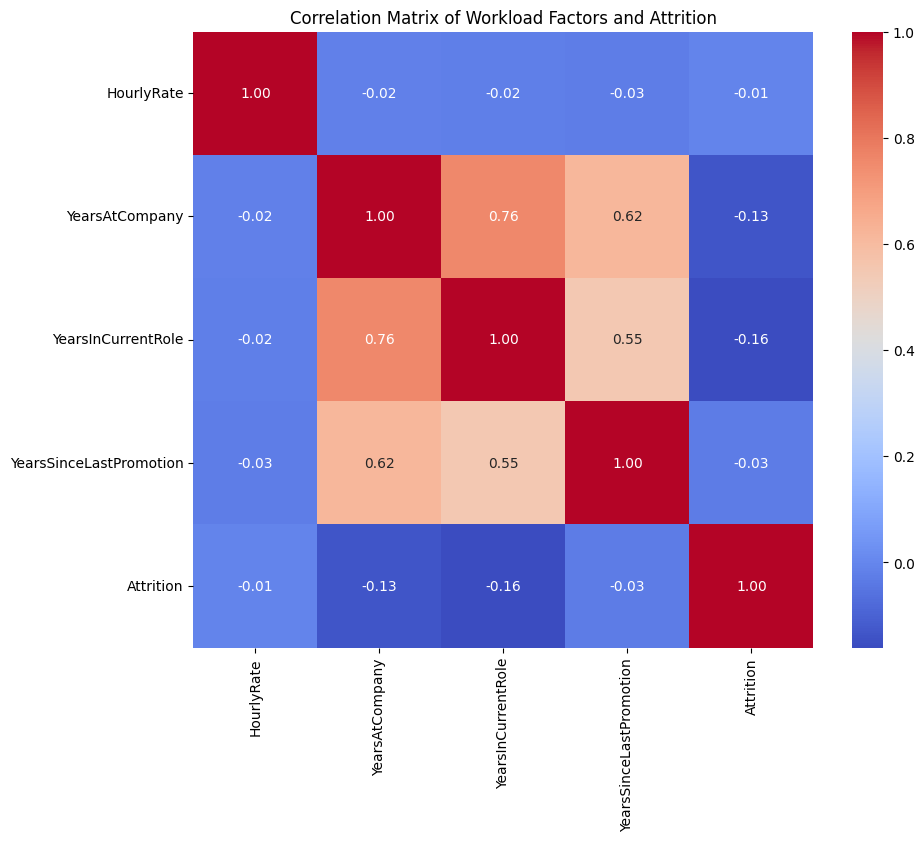

In [76]:
# Select relevant columns for analysis
workload_columns = ['HourlyRate', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']
workload_df = df[workload_columns]

# Convert 'OverTime' column to numeric (1 for Yes, 0 for No)
#workload_df.loc[:, 'OverTime'] = workload_df['OverTime'].map({'Yes': 1, 'No': 0})


# Calculate correlation matrix
correlation_matrix = workload_df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Workload Factors and Attrition')
plt.show()

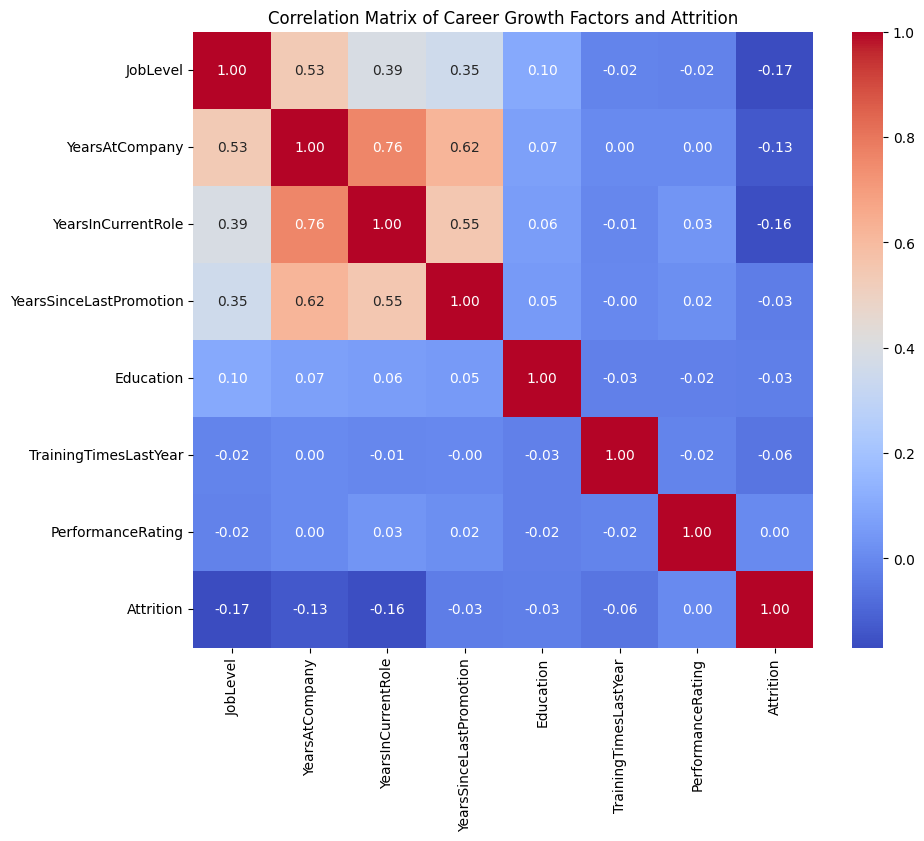

In [41]:
#Change all the categorical data of Education field into numerical data
df['EducationField'] = df['EducationField'].replace({
    'Medical': 0,
    'Life Sciences': 1,
    'Other': 2,
    'Marketing': 3,
    'Technical Degree': 4,
    'Human Resources': 5
})

# Select relevant columns for career growth analysis
career_growth_columns = ['JobLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Education', 'TrainingTimesLastYear', 'PerformanceRating', 'Attrition']
career_growth_df = df[career_growth_columns]

# Calculate correlation matrix
correlation_matrix = career_growth_df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Career Growth Factors and Attrition')
plt.show()

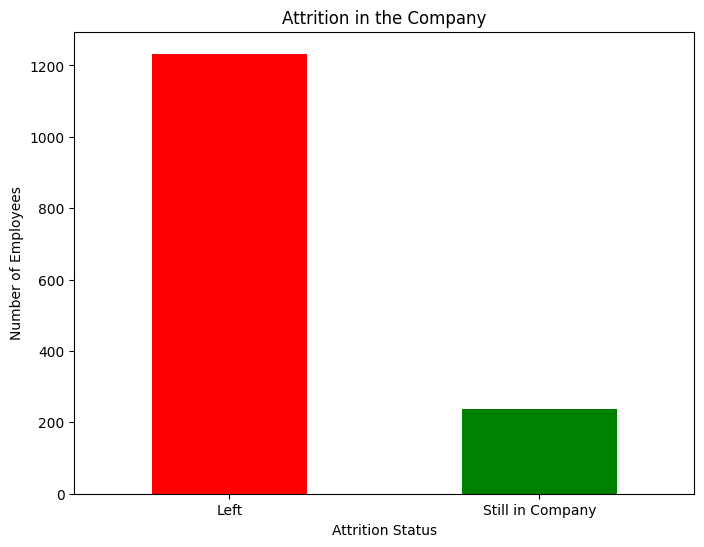

In [42]:
#Numberr of employes left and still working in the company
attrition_counts = df['Attrition'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
attrition_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.xticks([0, 1], ['Left', 'Still in Company'], rotation=0)
plt.show()

###Check the attriton rate according to the Age Group

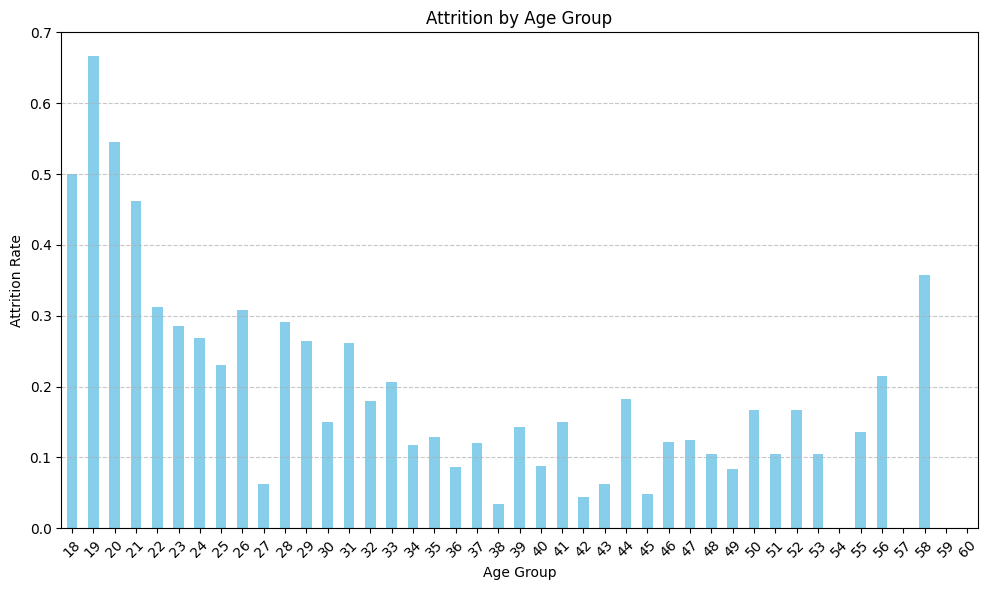

In [78]:
attrition_by_age = df.groupby('Age')['Attrition'].mean()

# Plotting
plt.figure(figsize=(10, 6))
attrition_by_age.plot(kind='bar', color='skyblue')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

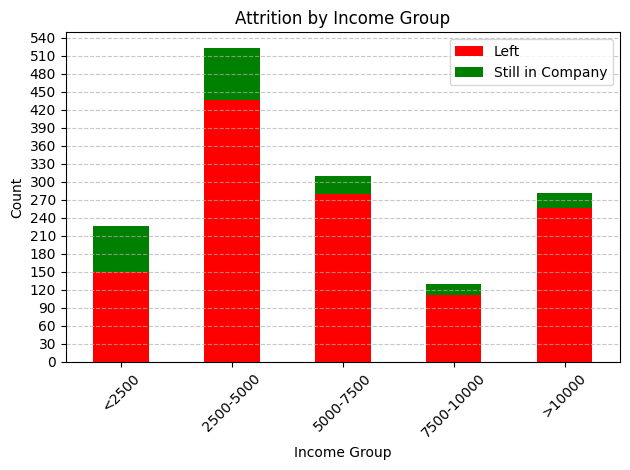

In [79]:
# Define the bins and labels for income groups
bins = [0, 2500, 5000, 7500, 10000, df['MonthlyIncome'].max()]
labels = ['<2500', '2500-5000', '5000-7500', '7500-10000', '>10000']

# Create a new column 'IncomeGroup' based on the defined bins
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels)

# Calculate attrition rate for each income group
attrition_counts_by_income = pd.crosstab(df['IncomeGroup'], df['Attrition'])

# Plotting
plt.figure(figsize=(10, 6))
attrition_counts_by_income.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Attrition by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Left', 'Still in Company'], loc='upper right')
plt.yticks(range(0, max(attrition_counts_by_income.sum(axis=1)) + 30, 30))  # Set y-axis ticks with steps of 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()